In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
p_timing_1 = np.genfromtxt('../analysis//timing_parallel_1.csv', dtype='f8', skip_header=2, delimiter=',', usecols=np.arange(1,10))
p_timing_2 = np.genfromtxt('../analysis//timing_parallel_2.csv', dtype='f8', skip_header=2, delimiter=',', usecols=np.arange(1,10))
p_timing_3 = np.genfromtxt('../analysis//timing_parallel_3.csv', dtype='f8', skip_header=2, delimiter=',', usecols=np.arange(1,10))

data_optim_500 = np.genfromtxt('../analysis/timing_optimizer_500.csv', dtype='f8', delimiter=',')
data_optim_1000 = np.genfromtxt('../analysis/timing_optimizer_1000.csv', dtype='f8', delimiter=',')
data_optim_2000 = np.genfromtxt('../analysis/timing_optimizer_2000.csv', dtype='f8', delimiter=',')

In [4]:
n_threads = p_timing_1[0]

p_timing_1 = p_timing_1[1:]
p_timing_2 = p_timing_2[1:]
p_timing_3 = p_timing_3[1:]

p_timing_len = len(p_timing_1)
p_timing_width = len(p_timing_1[0])

In [5]:
p_timing_1_median = np.median(p_timing_1, axis=0)
p_timing_2_median = np.median(p_timing_2, axis=0)
p_timing_3_median = np.median(p_timing_3, axis=0)

p_timing_1_vari = np.zeros(p_timing_width)
p_timing_2_vari = np.zeros(p_timing_width)
p_timing_3_vari = np.zeros(p_timing_width)

for i in range(p_timing_width):
    p_timing_1_vari[i] = np.sum((p_timing_1[i,:]-p_timing_1_median[i])**2)/(p_timing_len-1)
    p_timing_2_vari[i] = np.sum((p_timing_2[i,:]-p_timing_2_median[i])**2)/(p_timing_len-1)
    p_timing_3_vari[i] = np.sum((p_timing_3[i,:]-p_timing_3_median[i])**2)/(p_timing_len-1)

Text(0.5, 1.0, 'Robot Arm Joint Optimization, Timing Study; Max Iterations: 100, N Samples=100')

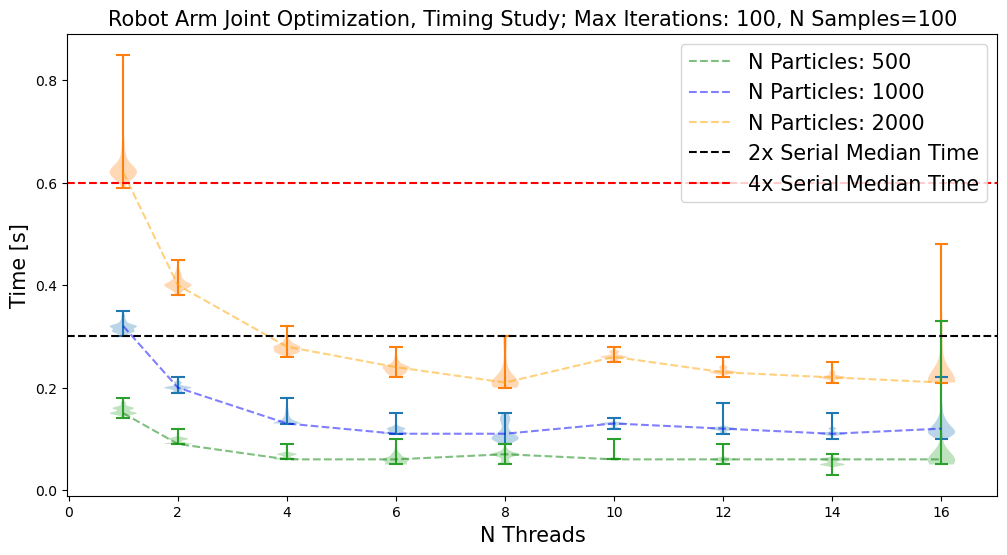

In [30]:
fig, ax1 = plt.subplots()
fig.set_size_inches(12,6)

ax1.violinplot(p_timing_1, n_threads)
ax1.violinplot(p_timing_2, n_threads)
ax1.violinplot(p_timing_3, n_threads)

ax1.plot(n_threads, p_timing_3_median, label='N Particles: 500', c='green', linestyle='--', alpha=0.5)
ax1.plot(n_threads, p_timing_1_median, label='N Particles: 1000', c='blue', linestyle='--', alpha=0.5)
ax1.plot(n_threads, p_timing_2_median, label='N Particles: 2000', c='orange', linestyle='--', alpha=0.5)

# ax1.axhline(p_timing_3_median[0]*2, linestyle='--', label='2x Serial Median Time', c='black')
# ax1.axhline(p_timing_3_median[0]*4, linestyle='--', label='4x Serial Median Time', c='red')

ax1.legend(fontsize=15)

ax1.set_xlabel('N Threads',fontsize=15)
ax1.set_ylabel('Time [s]',fontsize=15)

ax1.set_title('Robot Arm Joint Optimization, Timing Study; Max Iterations: 100, N Samples=100', fontsize=15)

In [7]:
def opt_time(data, o_t_data, index, acc = 1e-5):
    optimal_timing_01 = data[0::9]
    optimal_timing_02 = data[1::9]
    optimal_timing_04 = data[2::9]
    optimal_timing_06 = data[3::9]
    optimal_timing_08 = data[4::9]
    optimal_timing_10 = data[5::9]
    optimal_timing_12 = data[6::9]
    optimal_timing_14 = data[7::9]
    optimal_timing_16 = data[8::9]

    optimal_timing_01 = optimal_timing_01.reshape(100, 100, 2)
    optimal_timing_02 = optimal_timing_02.reshape(100, 100, 2)
    optimal_timing_04 = optimal_timing_04.reshape(100, 100, 2)      
    optimal_timing_06 = optimal_timing_06.reshape(100, 100, 2)
    optimal_timing_08 = optimal_timing_08.reshape(100, 100, 2)
    optimal_timing_10 = optimal_timing_10.reshape(100, 100, 2)
    optimal_timing_12 = optimal_timing_12.reshape(100, 100, 2)
    optimal_timing_14 = optimal_timing_14.reshape(100, 100, 2)
    optimal_timing_16 = optimal_timing_16.reshape(100, 100, 2)

    optimal_timing_01_opt_time = np.zeros(100)
    optimal_timing_02_opt_time = np.zeros(100)
    optimal_timing_04_opt_time = np.zeros(100)
    optimal_timing_06_opt_time = np.zeros(100)
    optimal_timing_08_opt_time = np.zeros(100)
    optimal_timing_10_opt_time = np.zeros(100)
    optimal_timing_12_opt_time = np.zeros(100)
    optimal_timing_14_opt_time = np.zeros(100)
    optimal_timing_16_opt_time = np.zeros(100)

    for i in range(100):
        optimal_timing_01_opt_time[i] = optimal_timing_01[i][:,1][optimal_timing_01[i][:,0] > acc][-1]
        optimal_timing_02_opt_time[i] = optimal_timing_02[i][:,1][optimal_timing_02[i][:,0] > acc][-1]
        optimal_timing_04_opt_time[i] = optimal_timing_04[i][:,1][optimal_timing_04[i][:,0] > acc][-1]
        optimal_timing_06_opt_time[i] = optimal_timing_06[i][:,1][optimal_timing_06[i][:,0] > acc][-1]
        optimal_timing_08_opt_time[i] = optimal_timing_08[i][:,1][optimal_timing_08[i][:,0] > acc][-1]
        optimal_timing_10_opt_time[i] = optimal_timing_10[i][:,1][optimal_timing_10[i][:,0] > acc][-1]
        optimal_timing_12_opt_time[i] = optimal_timing_12[i][:,1][optimal_timing_12[i][:,0] > acc][-1]
        optimal_timing_14_opt_time[i] = optimal_timing_14[i][:,1][optimal_timing_14[i][:,0] > acc][-1]
        optimal_timing_16_opt_time[i] = optimal_timing_16[i][:,1][optimal_timing_16[i][:,0] > acc][-1]

    optimal_timing_01_opt_time = optimal_timing_01_opt_time*(1E-6)
    optimal_timing_02_opt_time = optimal_timing_02_opt_time*(1E-6)
    optimal_timing_04_opt_time = optimal_timing_04_opt_time*(1E-6)
    optimal_timing_06_opt_time = optimal_timing_06_opt_time*(1E-6)
    optimal_timing_08_opt_time = optimal_timing_08_opt_time*(1E-6)
    optimal_timing_10_opt_time = optimal_timing_10_opt_time*(1E-6)
    optimal_timing_12_opt_time = optimal_timing_12_opt_time*(1E-6)
    optimal_timing_14_opt_time = optimal_timing_14_opt_time*(1E-6)
    optimal_timing_16_opt_time = optimal_timing_16_opt_time*(1E-6)

    o_t_data[index][0] = np.round(np.median(optimal_timing_01_opt_time),4)
    o_t_data[index][1] = np.round(np.median(optimal_timing_02_opt_time),4)
    o_t_data[index][2] = np.round(np.median(optimal_timing_04_opt_time),4)
    o_t_data[index][3] = np.round(np.median(optimal_timing_06_opt_time),4)
    o_t_data[index][4] = np.round(np.median(optimal_timing_08_opt_time),4)
    o_t_data[index][5] = np.round(np.median(optimal_timing_10_opt_time),4)
    o_t_data[index][6] = np.round(np.median(optimal_timing_12_opt_time),4)
    o_t_data[index][7] = np.round(np.median(optimal_timing_14_opt_time),4)
    o_t_data[index][8] = np.round(np.median(optimal_timing_16_opt_time),4)

    violin = np.array([
    optimal_timing_01_opt_time,
    optimal_timing_02_opt_time,
    optimal_timing_04_opt_time,
    optimal_timing_06_opt_time,
    optimal_timing_08_opt_time,
    optimal_timing_10_opt_time,
    optimal_timing_12_opt_time,
    optimal_timing_14_opt_time,
    optimal_timing_16_opt_time])

    temp = np.zeros((len(optimal_timing_01_opt_time),len(violin)))
    for i in range(9):
        temp[:,i] = violin[i]

    violin = temp

    return(o_t_data, violin)

Text(0, 0.5, 'Time [s]')

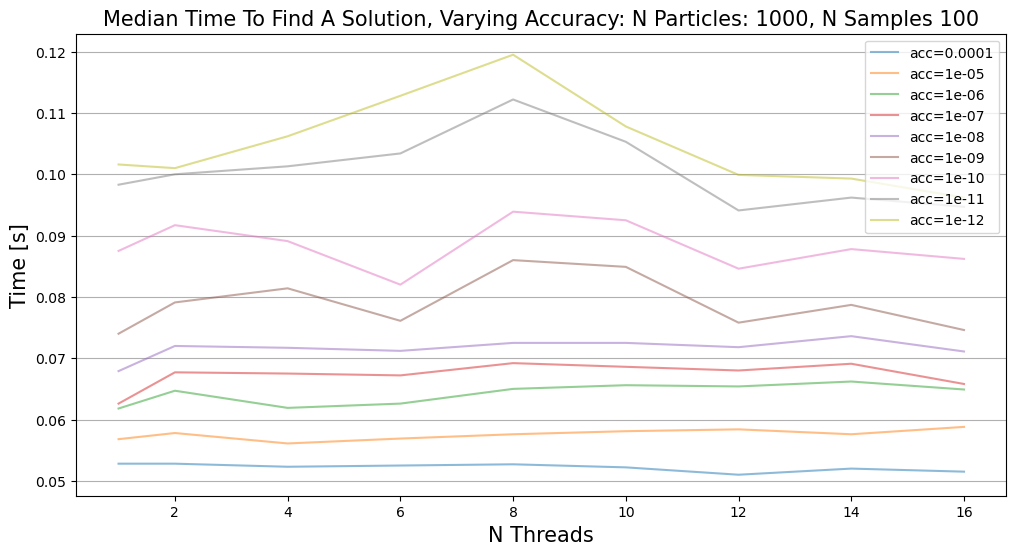

In [8]:
o_t_data_accs = np.zeros((3,9), dtype='f8')
fname = '../analysis/timing_optimizer_1000.csv'

fig, ax1 = plt.subplots()
fig.set_size_inches(12,6)

for i in [1E-4, 1E-5, 1E-6, 1E-7, 1E-8, 1E-9, 1E-10, 1E-11, 1E-12]:
    o_t_data_accs, o_t_violin_temp = opt_time(data_optim_1000, o_t_data_accs, 0, i)

    ax1.plot(n_threads, o_t_data_accs[0], label=f'acc={i}', linestyle='-', alpha=0.5)

ax1.legend()
ax1.grid(axis='y')

ax1.set_title('Median Time To Find A Solution, Varying Accuracy: N Particles: 1000, N Samples 100', fontsize=15)

ax1.set_xlabel('N Threads', fontsize=15)
ax1.set_ylabel('Time [s]', fontsize=15)

Text(0, 0.5, 'Time [s]')

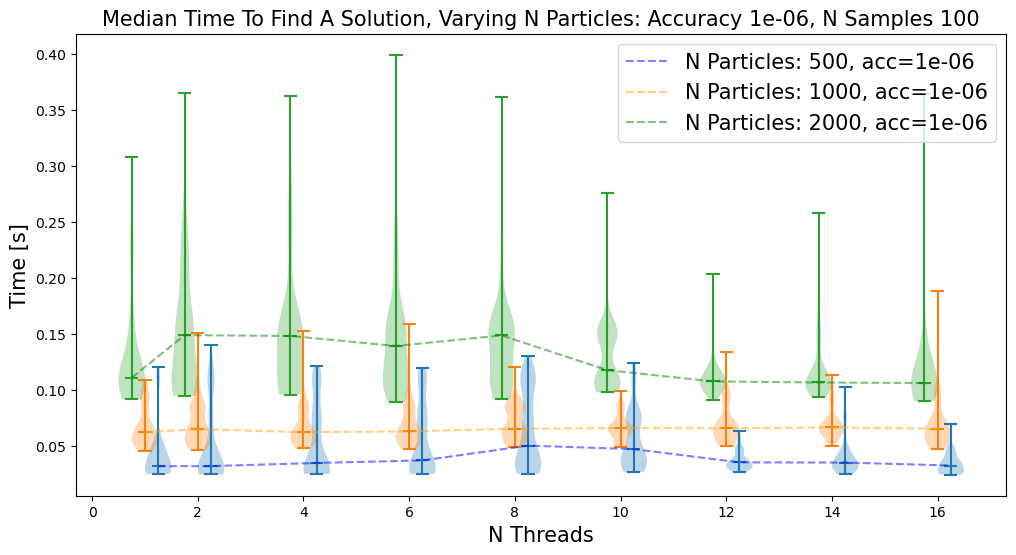

In [9]:
ideal_acc = 1e-6

o_t_data = np.zeros((3,9), dtype='f8')

o_t_data, o_t_violin_500 = opt_time(data_optim_500, o_t_data, 0, acc = ideal_acc)
o_t_data, o_t_violin_1000 = opt_time(data_optim_1000, o_t_data, 0, acc = ideal_acc)
o_t_data, o_t_violin_2000 = opt_time(data_optim_2000, o_t_data, 0, acc = ideal_acc)

fig, ax1 = plt.subplots()
fig.set_size_inches(12,6)

ax1.violinplot(o_t_violin_500,  n_threads+0.25, showmedians=True)
ax1.violinplot(o_t_violin_1000, n_threads, showmedians=True)
ax1.violinplot(o_t_violin_2000, n_threads-0.25, showmedians=True)

ax1.plot(n_threads+0.25, np.median(o_t_violin_500,axis=0),  label=f'N Particles: 500, acc={ideal_acc}', c='blue', linestyle='--', alpha=0.5)
ax1.plot(n_threads,      np.median(o_t_violin_1000,axis=0), label=f'N Particles: 1000, acc={ideal_acc}', c='orange', linestyle='--', alpha=0.5)
ax1.plot(n_threads-0.25, np.median(o_t_violin_2000,axis=0), label=f'N Particles: 2000, acc={ideal_acc}', c='green', linestyle='--', alpha=0.5)

ax1.legend(fontsize=15)

ax1.set_title('Median Time To Find A Solution, Varying N Particles: Accuracy ' + str(ideal_acc) + ', N Samples 100', fontsize=15)

ax1.set_xlabel('N Threads', fontsize=15)
ax1.set_ylabel('Time [s]', fontsize=15)

In [15]:
sol_times = np.genfromtxt('../results/time_to_sol_2000.txt', delimiter=',', dtype='f8', usecols=(0,2))

sort_index = np.argsort(sol_times[:,0])
sol_n_th = np.take_along_axis(sol_times[:,0], sort_index, axis=0)
sol_time = np.take_along_axis(sol_times[:,1], sort_index, axis=0)

In [11]:
threads = np.array([1, 2, 4, 6, 8, 10, 12, 14, 16])
sol_time_median = np.zeros_like(threads, dtype='f8')
sol_time_std = np.zeros_like(threads, dtype='f8')

for i in range(len(threads)):
    sol_time_median[i] = np.median(sol_time[sol_n_th==threads[i]])
    sol_time_std[i] = np.std(sol_time[sol_n_th==threads[i]])

In [17]:
sol_time_median

array([0.160085 , 0.153942 , 0.111733 , 0.1066505, 0.1193425, 0.1134785,
       0.1057395, 0.107072 , 0.1924265])

Text(0, 0.5, 'Time [s]')

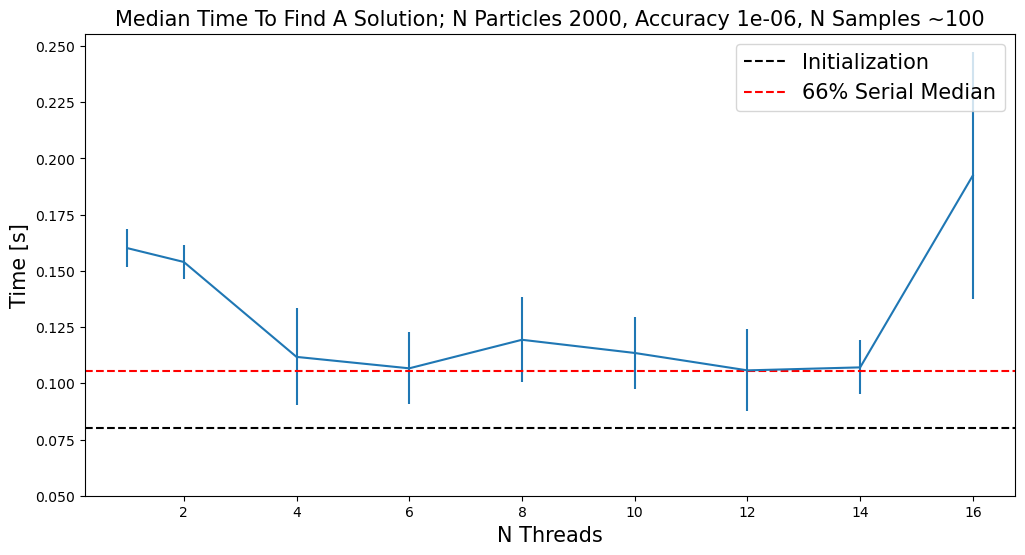

In [24]:
fig, ax1 = plt.subplots()
fig.set_size_inches(12,6)

ax1.errorbar(threads, sol_time_median, yerr=sol_time_std)
ax1.axhline(0.08, linestyle='--', c='black', label='Initialization') # inital serial portion of the code
ax1.axhline(sol_time_median[0]*0.66, linestyle='--', c='red', label='66% Serial Median')

ax1.set_ylim(0.05)

ax1.legend(fontsize=15)

ax1.set_title('Median Time To Find A Solution; N Particles 2000, Accuracy ' + str(ideal_acc) + ', N Samples ~100', fontsize=15)

ax1.set_xlabel('N Threads', fontsize=15)
ax1.set_ylabel('Time [s]', fontsize=15)